In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from keras.applications.inception_v3 import InceptionV3
import numpy as np
import matplotlib.pyplot as plt

model = models.load_model('modelv2.keras')
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 3, 3, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ clre2 (Flatten)                 │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ clre3 (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ clre4 (Dropout)                 │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ clre5 (Dense)                   │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,309,676 (230.06 MB)

 Trainable params: 29,066,629 (110.88 MB)

 Non-trainable params: 2,176,416 (8.30 MB)

 Optimizer params: 29,066,631 (110.88 MB)

None


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


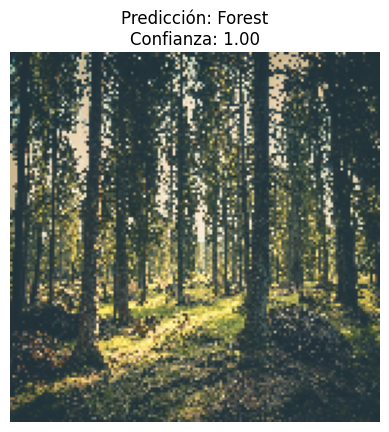

In [8]:
# Diccionario de nombres de clases
class_names = ['Coast', 'Desert', 'Forest', 'Glacier', 'Mountain']  # Reemplaza con los nombres de tus clases

# Carga de imagen
img_path = 'll.jpg'
img = image.load_img(img_path, target_size=(150, 150))  # Se ajusta el tamaño de acuerdo a la del modelo

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')

# Preprocesamiento de la imagen
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión extra para el batch
img_array /= 255.0  # Normalizar los pixeles

# Predicción
predictions = model.predict(img_array)

# Interpretación de predicción
predicted_class = np.argmax(predictions[0])  # Clase con mayor probabilidad
confidence = predictions[0][predicted_class]  # Confianza de la predicción
predicted_class_name = class_names[predicted_class]  # Nombre de la clase predicha

# Mostrar el nombre de la clase predicha
plt.title("Predicción: {}\nConfianza: {:.2f}".format(predicted_class_name, confidence))
plt.show()
